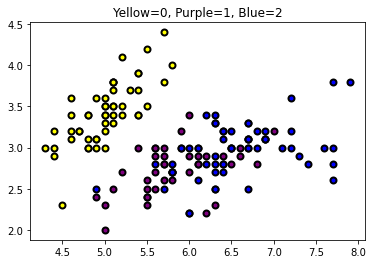

In [8]:
# Author: Dýrmundur Helgi R. Óskarsson
# Date: 30.8.2023
# Project: Assignment 2 - K nearest neighbours
# Acknowledgements: 
#

import numpy as np
import matplotlib.pyplot as plt
import help

from tools import load_iris, split_train_test, plot_points

d, t, classes = load_iris()
plot_points(d, t)

In [6]:
# Part 1.1
def euclidian_distance(x: np.ndarray, y: np.ndarray) -> float:
    '''
    Calculate the euclidian distance between points x and y
    '''
    return (np.sqrt(np.sum((x - y)**2)))

d, t, classes = load_iris()
x, points = d[0,:], d[1:, :]
x_target, point_targets = t[0], t[1:]
print(euclidian_distance(x, points[0]))
print(euclidian_distance(x, points[50]))

0.5385164807134502
3.6166282640050254


In [16]:
# Part 1.2

def euclidian_distances(x: np.ndarray, points: np.ndarray) -> np.ndarray:
    '''
    Calculate the euclidian distance between x and many
    points
    '''
    distances = np.zeros(points.shape[0]) # np.shape[0] gives us # of rows
    for i in range(points.shape[0]):
        distances[i] = euclidian_distance(x, points[i])
    return distances

euclidian_distances(x, points)

array([0.53851648, 0.50990195, 0.64807407, 0.14142136, 0.6164414 ,
       0.51961524, 0.17320508, 0.92195445, 0.46904158, 0.37416574,
       0.37416574, 0.59160798, 0.99498744, 0.88317609, 1.1045361 ,
       0.54772256, 0.1       , 0.74161985, 0.33166248, 0.43588989,
       0.3       , 0.64807407, 0.46904158, 0.59160798, 0.54772256,
       0.31622777, 0.14142136, 0.14142136, 0.53851648, 0.53851648,
       0.38729833, 0.6244998 , 0.80622577, 0.45825757, 0.37416574,
       0.41231056, 0.24494897, 0.8660254 , 0.14142136, 0.17320508,
       1.34907376, 0.76811457, 0.45825757, 0.6164414 , 0.59160798,
       0.36055513, 0.58309519, 0.3       , 0.2236068 , 4.00374824,
       3.61662826, 4.16413256, 3.09354166, 3.79209705, 3.41613817,
       3.78549865, 2.34520788, 3.74966665, 2.88790582, 2.70370117,
       3.22800248, 3.14642654, 3.7       , 2.58069758, 3.62767143,
       3.43511281, 3.00998339, 3.76828874, 2.88270706, 3.85356977,
       3.0757113 , 4.04722127, 3.65786823, 3.41613817, 3.59722

In [19]:
# Part 1.3

def k_nearest(x: np.ndarray, points: np.ndarray, k: int):
    '''
    Given a feature vector, find the indexes that correspond
    to the k-nearest feature vectors in points
    '''
    dist = euclidian_distances(x, points)
    nearest = np.argsort(dist)[:k]
    return nearest

print(k_nearest(x, points, 1))
print(k_nearest(x, points, 3))

[16]
[16  3 38]


In [1]:
    

def vote(targets, classes):
    '''
    Given a list of nearest targets, vote for the most
    popular
    '''
    probabilities = np.zeros(len(classes))
    
    for i, clas in enumerate(classes):
        for target in targets:
            if target == clas:
                probabilities[i] += 1
    return classes[np.argmax(probabilities)]


def knn(
    x: np.ndarray,
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
) -> np.ndarray:
    '''
    Combine k_nearest and vote
    '''
    k_points = k_nearest(x, points, k)
    k_point_targets = point_targets[k_points]
    return vote(k_point_targets, classes)


def knn_predict(
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
) -> np.ndarray:
    point_prediction = np.zeros(points.shape[0])
    for i, point in enumerate(points):
        point_prediction[i] = knn(point, help.remove_one(points, i), help.remove_one(point_targets, i), classes, k)
        

    return point_prediction


def knn_accuracy(
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
) -> float:
    prediction = knn_predict(points, point_targets, classes, k)
    return np.sum(prediction == point_targets) / points.shape[0]


def knn_confusion_matrix(
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
) -> np.ndarray:
    
    predictions = knn_predict(points, point_targets, classes, k)
    confusion_matrix = np.zeros((len(classes), len(classes)))
        
    for i in range(point_targets.shape[0]):
        true_value = point_targets[i]
        guess_value = predictions[i]
        confusion_matrix[(int(guess_value), true_value)] += 1
    return confusion_matrix


def best_k(
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
) -> int:
    
    highest_k = None
    highest_acc = float('-inf')
    for k in range(1, points.shape[0]):
        temp_acc = knn_accuracy(points, point_targets, classes, k)
        if temp_acc > highest_acc:
            highest_k = k
            highest_acc = temp_acc

    return highest_k


def knn_plot_points(
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
):
    incorrect = 'red'
    correct = 'green'
    colors = ['yellow', 'purple', 'blue']
    predictions = knn_predict(points, point_targets, classes, k)
    c_map = [colors[int(i)] for i in predictions]
    correctness = (predictions == point_targets)
    
    edge = np.array(correctness.shape[0]*[correct])
    edge[correctness == False] = incorrect

    plt.scatter(points[:,0], points[:,1], c=c_map, edgecolors=edge, linewidth=2) 
    

def weighted_vote(
    targets: np.ndarray,
    distances: np.ndarray,
    classes: list
) -> int:
    '''
    Given a list of nearest targets, vote for the most
    popular
    '''
    # Remove if you don't go for independent section
    ...


def wknn(
    x: np.ndarray,
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
) -> np.ndarray:
    '''
    Combine k_nearest and vote
    '''
    # Remove if you don't go for independent section
    ...


def wknn_predict(
    points: np.ndarray,
    point_targets: np.ndarray,
    classes: list,
    k: int
) -> np.ndarray:
    # Remove if you don't go for independent section
    ...


def compare_knns(
    points: np.ndarray,
    targets: np.ndarray,
    classes: list
):
    # Remove if you don't go for independent section
    ...